# CYCLONE PREDICTION

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report

In [50]:
Cyclone_Data = pd.read_csv('cyclone_dataset.csv')
Cyclone_Data.head()

,Sea_Surface_Temperature,Atmospheric_Pressure,Humidity,Wind_Shear,Vorticity,Latitude,Ocean_Depth,Proximity_to_Coastline,Pre_existing_Disturbance,Cyclone
0,27.498160,1008.521429,89.279758,13.979877,0.000020,8.119890,76.137625,1.366176,1,1
1,28.404460,1001.242177,60.823380,19.548648,0.000084,9.246782,131.821235,0.683405,1,1
2,27.216969,995.742693,77.277801,9.368437,0.000063,7.789877,181.465092,0.866362,1,1
3,27.824280,1003.555279,67.986951,12.713517,0.000061,5.929008,323.395183,0.670524,1,1
4,26.260206,1008.466566,98.625281,17.125960,0.000034,6.953442,357.904862,0.940152,1,1


In [51]:
features = [
    "Sea_Surface_Temperature", "Atmospheric_Pressure", "Humidity", 
    "Wind_Shear", "Vorticity", "Latitude", "Ocean_Depth", 
    "Proximity_to_Coastline", "Pre_existing_Disturbance"
]
target = "Cyclone"

In [52]:
Cyclone_Data = Cyclone_Data.dropna()

In [53]:
X = Cyclone_Data[features]
y = Cyclone_Data[target]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
if Cyclone_Data[target].dtype == 'float64' or Cyclone_Data[target].dtype == 'int64':
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    regression = True
else:
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    regression = False

In [56]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
y_pred = model.predict(X_test)

In [58]:
if regression:
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error: {mae:.2f}")
else:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))


Mean Absolute Error: 0.00


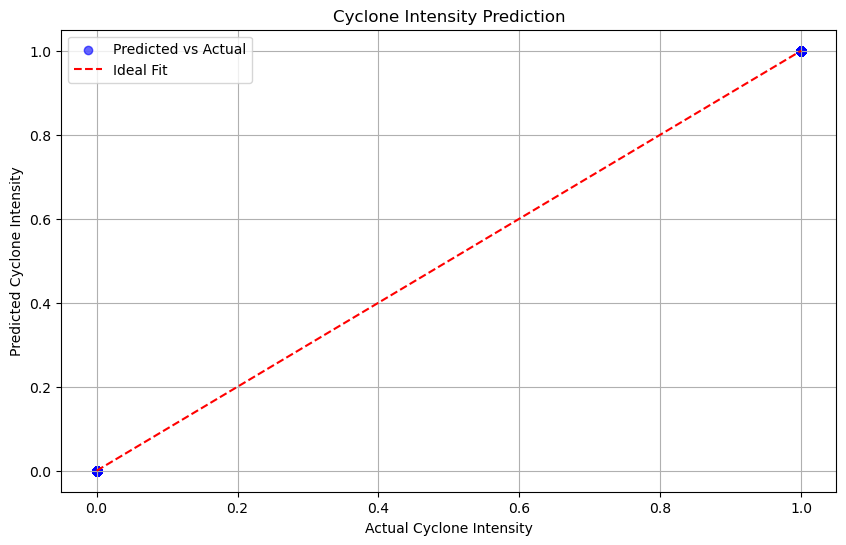

In [59]:
if regression:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Ideal Fit")
    plt.xlabel("Actual Cyclone Intensity")
    plt.ylabel("Predicted Cyclone Intensity")
    plt.title("Cyclone Intensity Prediction")
    plt.legend()
    plt.grid(True)
    plt.show()

In [60]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [61]:
y_pred = model.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [63]:
new_data = pd.DataFrame({
    "Sea_Surface_Temperature": [28.5],  
    "Atmospheric_Pressure": [1005],     
    "Humidity": [85],                  
    "Wind_Shear": [10],                 
    "Vorticity": [7],                    
    "Latitude": [12],                     
    "Ocean_Depth": [3000],               
    "Proximity_to_Coastline": [150],     
    "Pre_existing_Disturbance": [1]    
})

In [64]:
cyclone_prediction = model.predict(new_data)

In [65]:
if cyclone_prediction[0] == 1:
    print("WARNING: Cyclone Incoming! Take Precautions! ")
else:
    print("No Cyclone Detected. Weather is stable.")

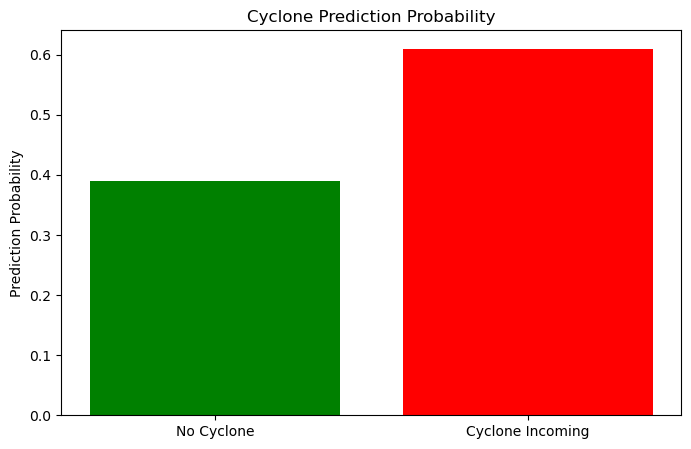

In [66]:
plt.figure(figsize=(8, 5))
plt.bar(["No Cyclone", "Cyclone Incoming"], model.predict_proba(new_data)[0], color=["green", "red"])
plt.ylabel("Prediction Probability")
plt.title("Cyclone Prediction Probability")
plt.show()

# FLOODS PREDICTION

In [67]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [68]:
Flood_Data = pd.read_csv('flood_risk_dataset_india.csv')
Flood_Data.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0


In [69]:
Flood_Data.isnull().sum()

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64

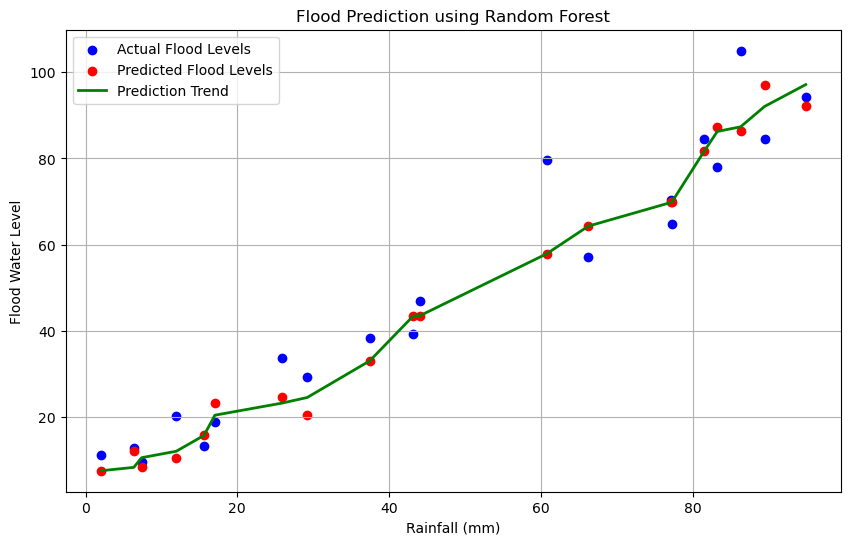

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
np.random.seed(42)
X = np.random.rand(100, 1) * 100  
y = X.ravel() + np.random.normal(0, 10, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual Flood Levels")
plt.scatter(X_test, y_pred, color="red", label="Predicted Flood Levels")
plt.plot(sorted(X_test.ravel()), sorted(y_pred), color="green", linewidth=2, label="Prediction Trend")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Flood Water Level")
plt.title("Flood Prediction using Random Forest")
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

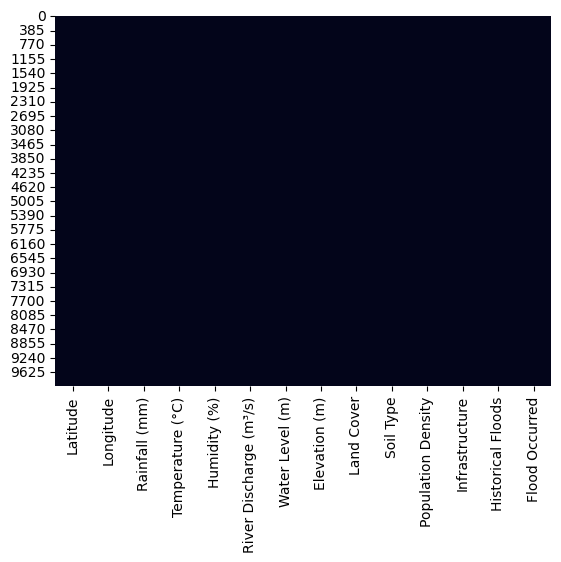

In [71]:
sns.heatmap(Flood_Data.isnull(), cbar=False)

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = Flood_Data.drop(columns=['Flood Occurred'])
y = Flood_Data['Flood Occurred']

numeric_features = ['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)',
                    'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)', 'Population Density']

categorical_features = ['Land Cover', 'Soil Type', 'Infrastructure', 'Historical Floods']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

flood_probabilities = pipeline.predict_proba(X)[:, 1]  

Flood_Data['Flood Probability'] = flood_probabilities

Flood_Data[['Flood Occurred', 'Flood Probability']]


,Flood Occurred,Flood Probability
0,1,0.59
1,0,0.20
2,1,0.78
3,0,0.54
4,0,0.20
...,...,...
9995,0,0.26
9996,0,0.19
9997,1,0.76
9998,1,0.42


In [83]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle

In [84]:
X = Flood_Data.drop(columns=['Flood Probability'])
y = Flood_Data['Flood Probability']

In [85]:
numeric_features = ['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)',
                    'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)', 'Population Density']

categorical_features = ['Land Cover', 'Soil Type', 'Infrastructure', 'Historical Floods']

In [86]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [87]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [88]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestRegressor(random_state=42))])

In [89]:
X = Flood_Data.drop(columns=['Flood Probability'])
y = Flood_Data['Flood Probability']

numeric_features = ['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)',
                    'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)', 'Population Density']
categorical_features = ['Land Cover', 'Soil Type', 'Infrastructure', 'Historical Floods']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Latitude', 'Longitude',
                                                   'Rainfall (mm)',
                                                   'Temperature (°C)',
                                                   'Humidity (%)',
                                                   'River Discharge (m³/s)',
                                                   'Water Level (m)',
                                                   'Elevation (m)',
                                                   'Population Density']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Land Cover', 'Soil Type',
                                                   'Infrastructure',
                                                   'Historical Floods'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [90]:
with open('flood_batata.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [91]:
with open('flood_batata.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print(type(loaded_model)) 
new_data = pd.DataFrame({
    'Latitude': [18.861663],
    'Longitude': [78.835584],
    'Rainfall (mm)': [218.999493],
    'Temperature (°C)': [34.144337],
    'Humidity (%)': [43.912963],
    'River Discharge (m³/s)': [4236.182888],
    'Water Level (m)': [7.415552],
    'Elevation (m)': [377.465433],
    'Land Cover': ['Water Body'],
    'Soil Type': ['Clay'],
    'Population Density': [7276.742184],
    'Infrastructure': [1],
    'Historical Floods': [0]
})
predicted_probabilities = loaded_model.predict(new_data)
print(f"Predicted Flood Probability: {predicted_probabilities[0]}")

<class 'sklearn.pipeline.Pipeline'>
Predicted Flood Probability: 0.5654000000000008


# EARTHQUAKE PREDICTION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
from sklearn.model_selection import train_test_split
import calendar

In [ ]:
Earthquake = pd.read_csv('EQ.csv')
Earthquake.head()

In [ ]:
Earthquake.columns

In [ ]:
Earthquake_Data = Earthquake[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
Earthquake_Data.head()

In [ ]:
if Earthquake_Data is not None:
    print(Earthquake_Data.head())

In [ ]:
timestamp = []

for d, t in zip(Earthquake_Data.get('Date', []), Earthquake_Data.get('Time', [])):
    try:
       
        ts = datetime.datetime.strptime(d + ' ' + t, '%m/%d/%Y %H:%M:%S')
        if ts.year < 1970 or ts.year > 3000:
            print(f"Skipping out-of-range date: {d} {t}")
            timestamp.append(None)  
        else:
          timestamp.append(calendar.timegm(ts.utctimetuple()))

    except ValueError as e:
        print(f"Error parsing date/time: {d} {t} -> {e}")
        timestamp.append(None)  

print("Sample Timestamps:", timestamp[:10])
if len(Earthquake_Data) == len(timestamp):
    Earthquake_Data['Timestamp'] = timestamp
else:
    print("Warning: Length mismatch between DataFrame and timestamp list")

In [ ]:
Earthquake_Data['Timestamp'] = pd.Series(timestamp)  
print(Earthquake_Data.head())

In [ ]:
print(len(Earthquake_Data), len(timestamp))
print(Earthquake_Data[Earthquake_Data['Timestamp'].isna()])
print(Earthquake_Data.head())

In [ ]:
EQ_Data = Earthquake_Data.drop(['Date', 'Time'], axis=1)
EQ_Data = EQ_Data[EQ_Data.Timestamp != 'ValueError']
EQ_Data.head()

In [ ]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = EQ_Data["Longitude"].tolist()
latitudes = EQ_Data["Latitude"].tolist()

x,y = m(longitudes,latitudes)

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

latitudes = EQ_Data["19.7515"].tolist()
longitudes = EQ_Data["75.7139"].tolist()

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'yellow')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()

In [ ]:
Picsart_25-03-08_10-28-30-524~2.jpg

In [ ]:
X = EQ_Data[['Timestamp', 'Latitude', 'Longitude']]
y = EQ_Data[['Magnitude', 'Depth']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("Missing values in X before handling:", np.isnan(X).sum())

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)  

y = np.array(y) 

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)  

print("Sample Predictions:", y_pred[:5])

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


In [ ]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

In [ ]:
reg.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

In [ ]:
best_fit.score(X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt

# Sample latitude and longitude data
latitudes = [26.0173, 26.0474, 26.0889, 26.0642]  
longitudes = [76.5026, 76.5001, 76.4786, 76.5123]  

plt.figure(figsize=(8, 6))
plt.scatter(longitudes, latitudes, c='red', marker='o', label='Locations')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Scatter Plot")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

latitudes = [26.0173, 26.0474, 26.0889, 26.0642]  
longitudes = [76.5026, 76.5001, 76.4786, 76.5123]  

plt.figure(figsize=(8, 6))
plt.scatter(longitudes, latitudes, c='red', marker='o', label='Locations')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Scatter Plot")
plt.legend()
plt.grid(True)
plt.show()
